In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='Species'>

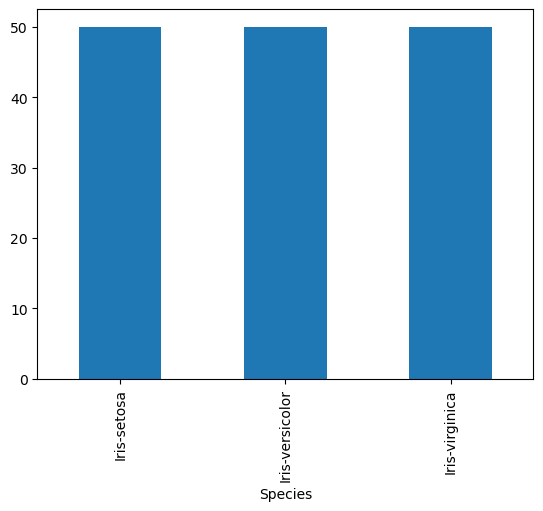

In [8]:
df['Species'].value_counts().plot(kind='bar')

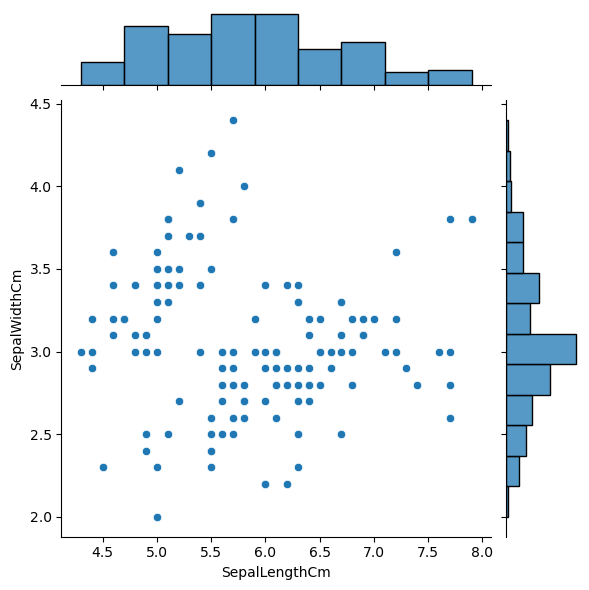

In [12]:
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=df)

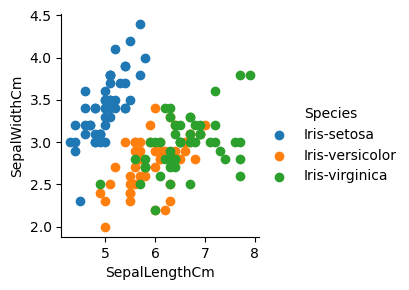

In [15]:
sns.FacetGrid(data=df, hue='Species').map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

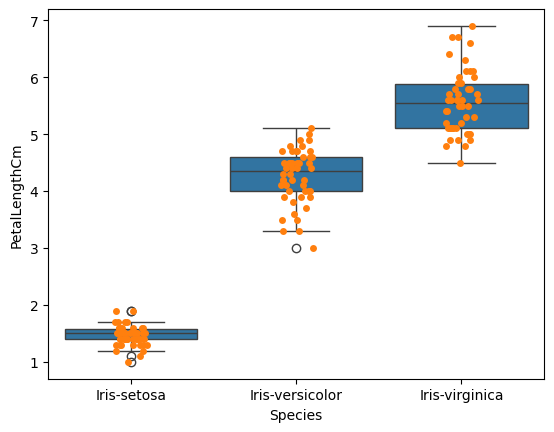

In [20]:
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
sns.stripplot(x='Species', y='PetalLengthCm', data=df, jitter=True, edgecolor='black')

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

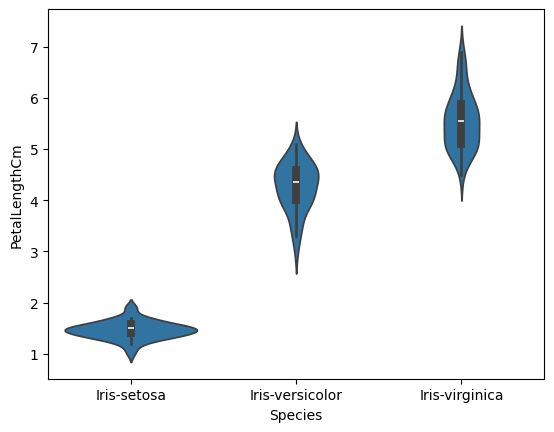

In [21]:
sns.violinplot(x='Species', y='PetalLengthCm', data=df)

C:\Users\jigar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


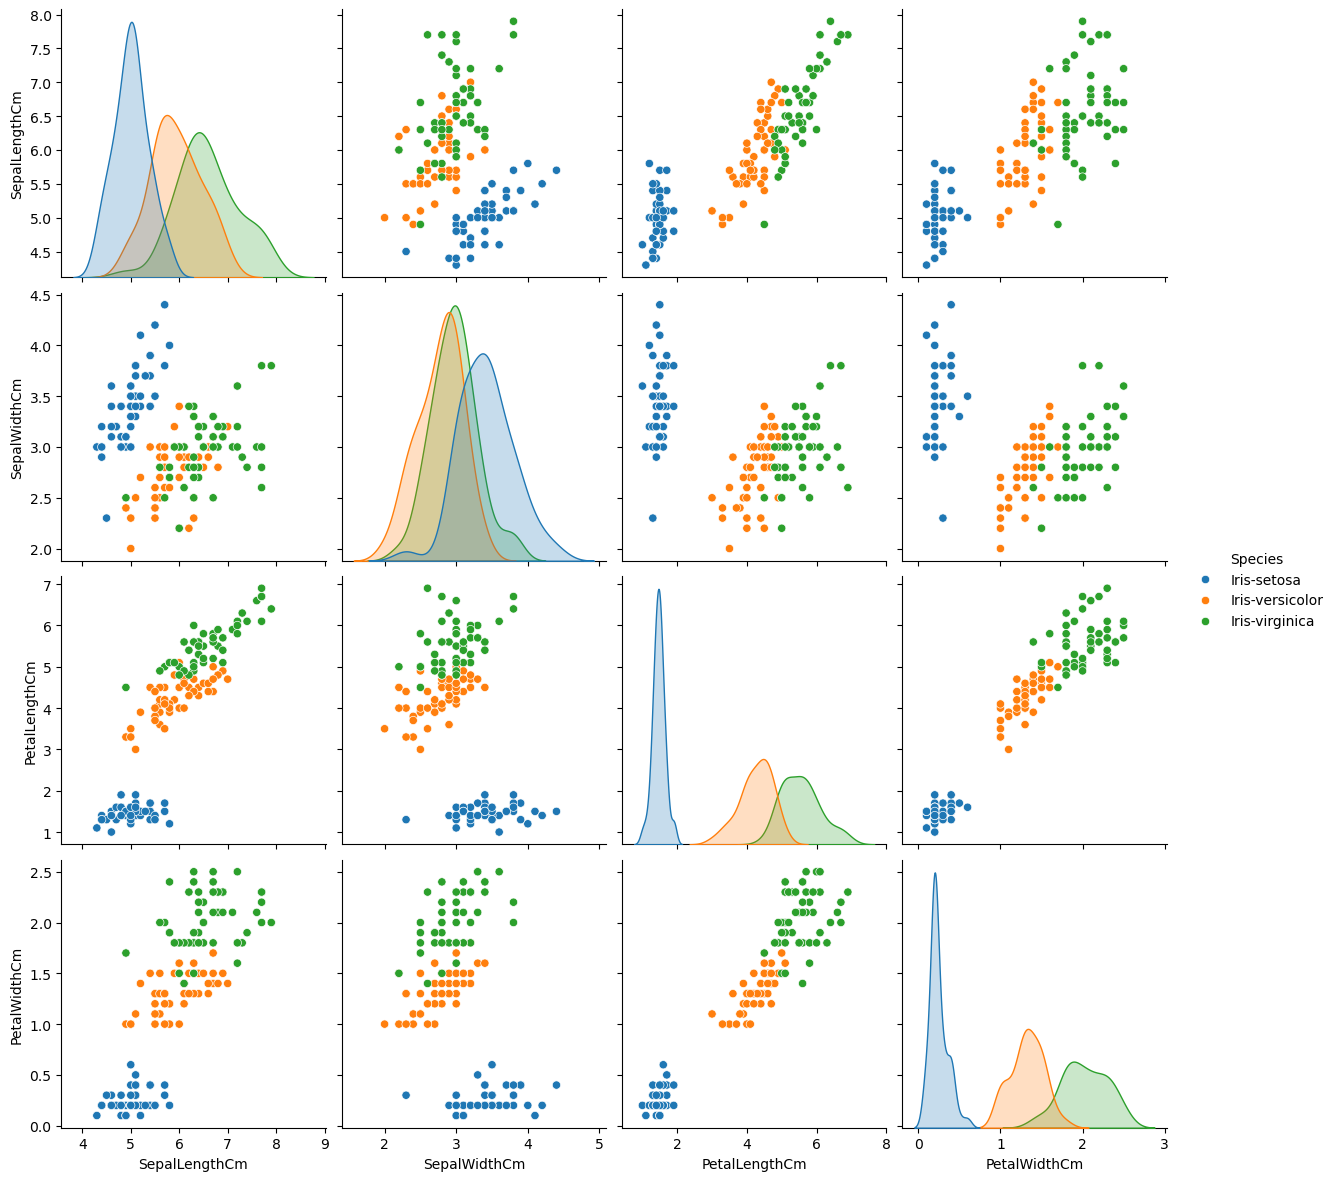

In [22]:
sns.pairplot(df.drop('Id', axis=1), hue='Species', size=3, diag_kind='kde')

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

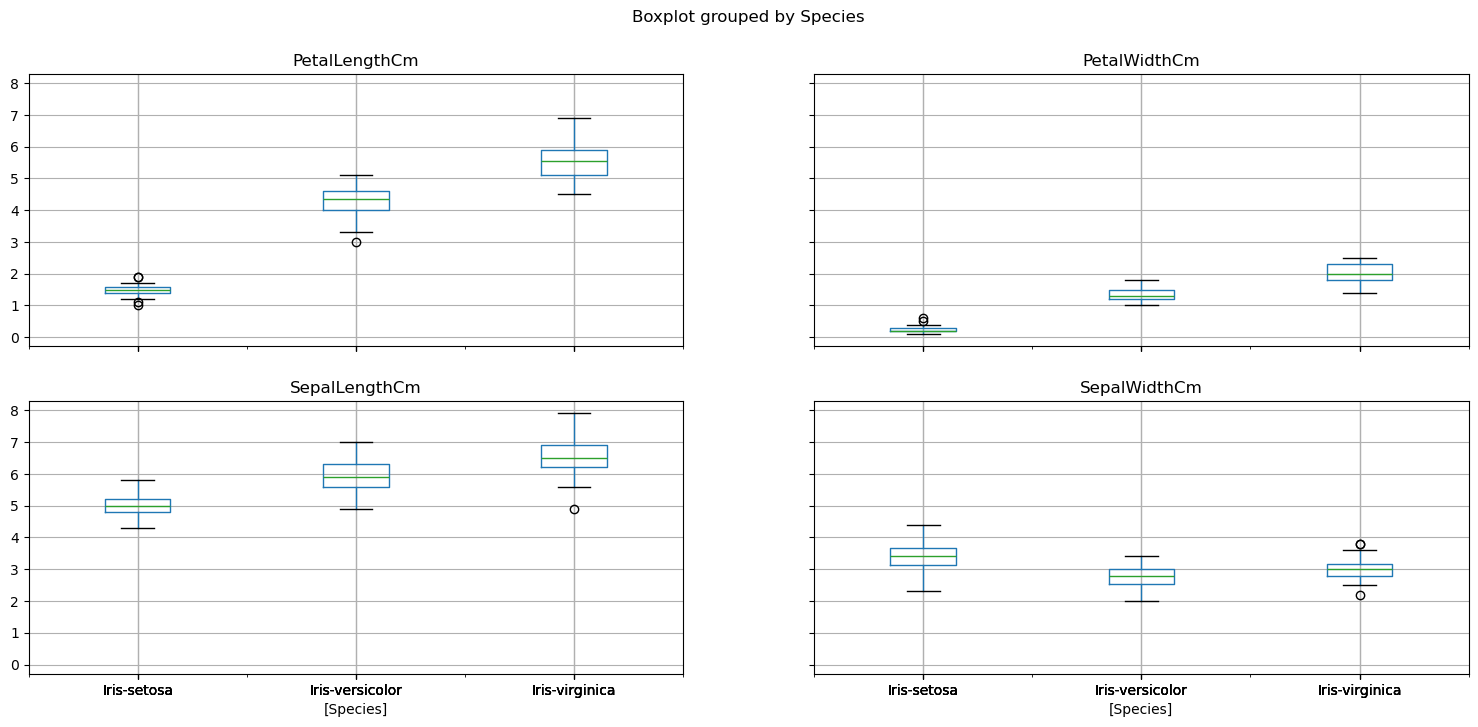

In [26]:
df.drop('Id', axis=1).boxplot(by="Species", figsize=(18, 8))

# Outliers
### Why it is important to deal with outliers?

Above EDA incates that there are outliers. Having outliers can affect Machine Learning model training.

They mainly affects parameters such as mean and variance, but median is robust towards outliers. 

#### What causes generation of outliers?

1. Data Entry: Human errors during data collection
2. Measurement Error: When Data collection instrument is malfunctioned
3. Natural Ourlier: When none of above is the root-cause

#### Outlier types 

There are two types of outliers: **Univariate** and **Multivariate**.

Univariate outliers can be found by analyzing single variable, while Multi-variate outliers are in an n-dimentional space.

### Different outlier detection techniques
1. Hypothesis Testing
2. Z-score method
3. Robust Z-score
4. I.Q.R method
5. Winsorization method (precentile capping)
6. DBSCAN Clustering
7. Isolation Forest
8. Visualizing the data


## Hypothesis testing (Grubb's Test)

**H0:** There are no outliers

**H1:** There are outliers

For Grubb's test we need to calculate the g_calculated and g_critical

Then if g_calculated is less than g_critical, then there are no outliers,
if the case is other was, then there are outliers.


In [57]:
import numpy as np
import scipy.stats as stats

def get_mean(func):
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        n = len(result)
        mean_x = result.mean()
        std_x = result.std()
        res_min_mean = result-mean_x
        g_calculated = res_min_mean.abs().max()/std_x
        t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
        g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
        return g_calculated - g_critical
    return wrapper
@get_mean
def GrubbsTest(df):
    df = df.select_dtypes(include=['number'])
    #print(df.columns)
    return df

if __name__ == "__main__":
    result = GrubbsTest(df.drop('Id', axis=1))
    print(result)

SepalLengthCm   -1.033311
SepalWidthCm    -0.412725
PetalLengthCm   -1.736632
PetalWidthCm    -1.811820
dtype: float64


In [48]:
len(df)

150

In [34]:
# Define a simple decorator
def simple_decorator(func):
    def wrapper(*args, **kwargs):
        print("Before the function call")
        result = func(*args, **kwargs)
        print("After the function call")
        return result
    return wrapper

# Use the decorator with the @ syntax
@simple_decorator
def say_hello(name):
    print(f"Hello, {name}!")

# Call the decorated function
say_hello("Alice")


Before the function call
Hello, Alice!
After the function call
